In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from sklearn import cluster

In [17]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [18]:
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

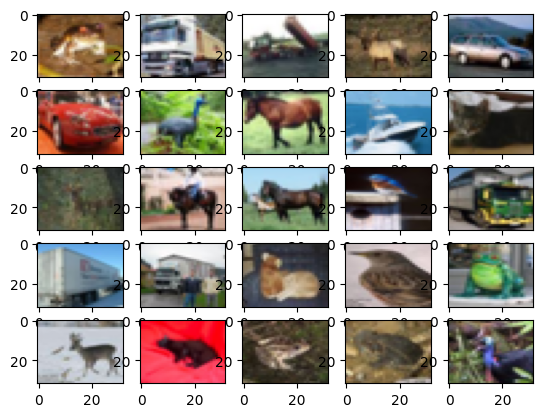

In [19]:
fig, ax = plt.subplots(5, 5)
k = 0
for i in range(5):
    for j in range(5):
        ax[i, j].imshow(x_train[k], aspect='auto') 
        k += 1
plt.show()

In [20]:
'''
Clean model training to go here
'''

'\nClean model training to go here\n'

In [21]:
print(f'Shape of training data: {x_train.shape}, {y_train.shape}')
x_aux, y_aux = x_train[25000:], y_train[25000:]
x_train, y_train = x_train[:25000], y_train[:25000]
print(f'Shape of training data: {x_train.shape}, {y_train.shape}')
print(f'Shape of aux data: {x_aux.shape}, {y_aux.shape}')
print(f'Shape of test data: {x_test.shape}, {y_test.shape}')

Shape of training data: (50000, 32, 32, 3), (50000,)
Shape of training data: (25000, 32, 32, 3), (25000,)
Shape of aux data: (25000, 32, 32, 3), (25000,)
Shape of test data: (10000, 32, 32, 3), (10000,)


In [22]:
'''
0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
'''

'\n0: airplane\n1: automobile\n2: bird\n3: cat\n4: deer\n5: dog\n6: frog\n7: horse\n8: ship\n9: truck\n'

# ClusterMatch

## PreProcessing

In [23]:
x_aux = x_aux.reshape(25000, -1)
x_train = x_train.reshape(25000, -1)
x_test = x_test.reshape(10000, -1)
print(f'Shape of training data: {x_train.shape}, {y_train.shape}')
print(f'Shape of aux data: {x_aux.shape}, {y_aux.shape}')
print(f'Shape of test data: {x_test.shape}, {y_test.shape}')

Shape of training data: (25000, 3072), (25000,)
Shape of aux data: (25000, 3072), (25000,)
Shape of test data: (10000, 3072), (10000,)


In [ ]:
poison_rates = [0.5, 1, 2]

np.random.seed(0)

kmeans = cluster.KMeans(n_clusters=100) # euclidian distance
# better method of kmeans on image datasets - dimensionality reduction
# lpips - perceptual similarity metric - images are close depending on how humands perceive them
# opencv library has another kmeans implementation - likely better choice for image clustering
# kmeans on images
kmeans.fit(x_aux)

train_km = kmeans.predict(x_train)
test_km = kmeans.predict(x_test)

cluster_indices, cluster_counts = np.unique(kmeans.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')
print(f'Cluster indices: {cluster_indices}')

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


There are 100 unique clusters in the auxiliary data
Cluster counts: [119 154 236 320 316 177 212 228 414 112 197 313 224 361 327 357 306 324
 264 312 267 268 162 168 149 116 558 232 265 233 232 214 237 135 253 136
 188 267 428 224 141 276 248 434 251 278 208 187 145 277 106 413 312 349
 192 175 172 175 207 318 208 261 212 233 502 315 208 190  86 154 240 303
 498 130 209 216 285 296 125 281 273 164 161 185 173 259 423 430 454 308
 163 338 102 243 157 206 390 157 413 180]
Cluster indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


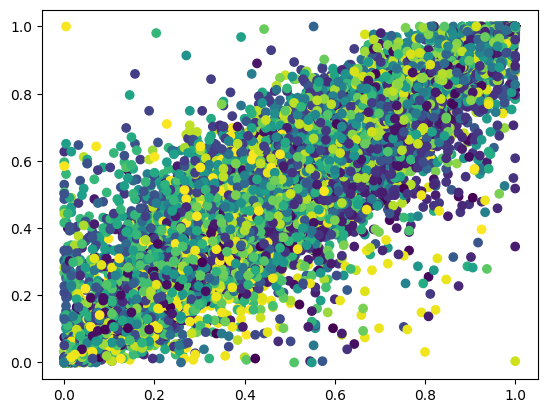

In [25]:
y_pred = kmeans.predict(x_aux)
plt.scatter(x_aux[:, 0], x_aux[:, 1], c=y_pred)
plt.show()

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
x_aux_pca = pca.fit_transform(x_aux)

kmeans_pca = cluster.KMeans(n_clusters=100)
cluster_labels = kmeans_pca.fit_predict(x_aux_pca)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


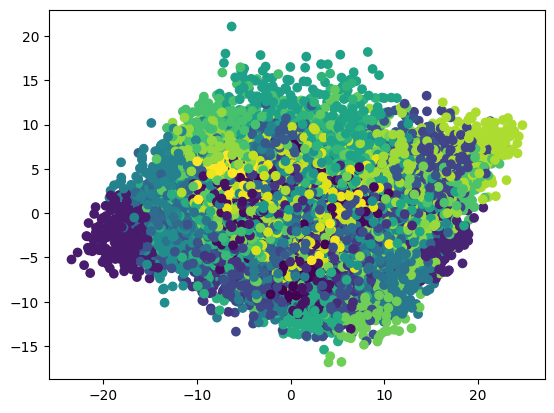

In [27]:
plt.scatter(x_aux_pca[:, 0], x_aux_pca[:, 1], c=cluster_labels)
plt.show()

In [29]:
print(cluster_labels)

cluster_indices, cluster_counts = np.unique(kmeans_pca.labels_, return_counts=True)

print(f'There are {len(cluster_indices)} unique clusters in the auxiliary data')
print(f'Cluster counts: {cluster_counts}')
print(f'Cluster indices: {cluster_indices}')

[ 7 28 23 ... 61 59 98]
There are 100 unique clusters in the auxiliary data
Cluster counts: [319 136 356 271 365 258 264 269 561 162 195 195 238 356 200 240 402 142
 183 222 182 312 165 405 231 235 193 285 306 142 277 195 153 150 250 177
 108 265 476 467 236 225 198 277 253 271 148 133 423 158 292 314 297 586
 428 129 153 203 209 201 260 261 232 243 125 183 223 179 421 144 190 142
 112 310 202 189 223 177 151 224 261 237 315 294 126 266 372 186 312 118
 259 386 243 273 371 149 308 259 211 421]
Cluster indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [ ]:
#valid_subpopulations = [(subpop, count) for subpop, count in zip(cluster_indices, cluster_counts)]
